<a href="https://colab.research.google.com/github/mohamed-12-4/Center/blob/main/Project_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d diegosilvadefrana/fisical-activity-dataset

-rw-r--r-- 1 root root 62 Jul 27 14:51 kaggle.json
/content
 98% 292M/297M [00:02<00:00, 117MB/s]
100% 297M/297M [00:02<00:00, 111MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
!unzip /content/fisical-activity-dataset.zip

Archive:  /content/fisical-activity-dataset.zip
  inflating: dataset2.csv            


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(50,10)})


In [4]:
df = pd.read_csv("/content/dataset2.csv")

activityID                    10.000000
heart_rate                   104.000000
hand temperature (°C)         30.000000
hand acceleration X ±16g       2.188370
hand acceleration Y ±16g       8.565600
hand acceleration Z ±16g       3.661790
hand gyroscope X              -0.024413
hand gyroscope Y               0.047759
hand gyroscope Z               0.006474
hand magnetometer X           14.899100
hand magnetometer Y          -69.222400
hand magnetometer Z           -5.823110
chest temperature (°C)        31.812500
chest acceleration X ±16g      0.319530
chest acceleration Y ±16g      9.612820
chest acceleration Z ±16g     -1.493280
chest gyroscope X              0.013685
chest gyroscope Y              0.001486
chest gyroscope Z             -0.041522
chest magnetometer X           1.016900
chest magnetometer Y         -50.396600
chest magnetometer Z          43.176800
ankle temperature (°C)        30.312500
ankle acceleration X ±16g      9.693700
ankle acceleration Y ±16g     -1.579020


In [5]:

df["heart_rate"] = df["heart_rate"].fillna(df["heart_rate"].mean())

df.isna().sum()

activityID                   0
heart_rate                   0
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         0
ankle magnetometer Z         0
PeopleId

<Axes: xlabel='activityID'>

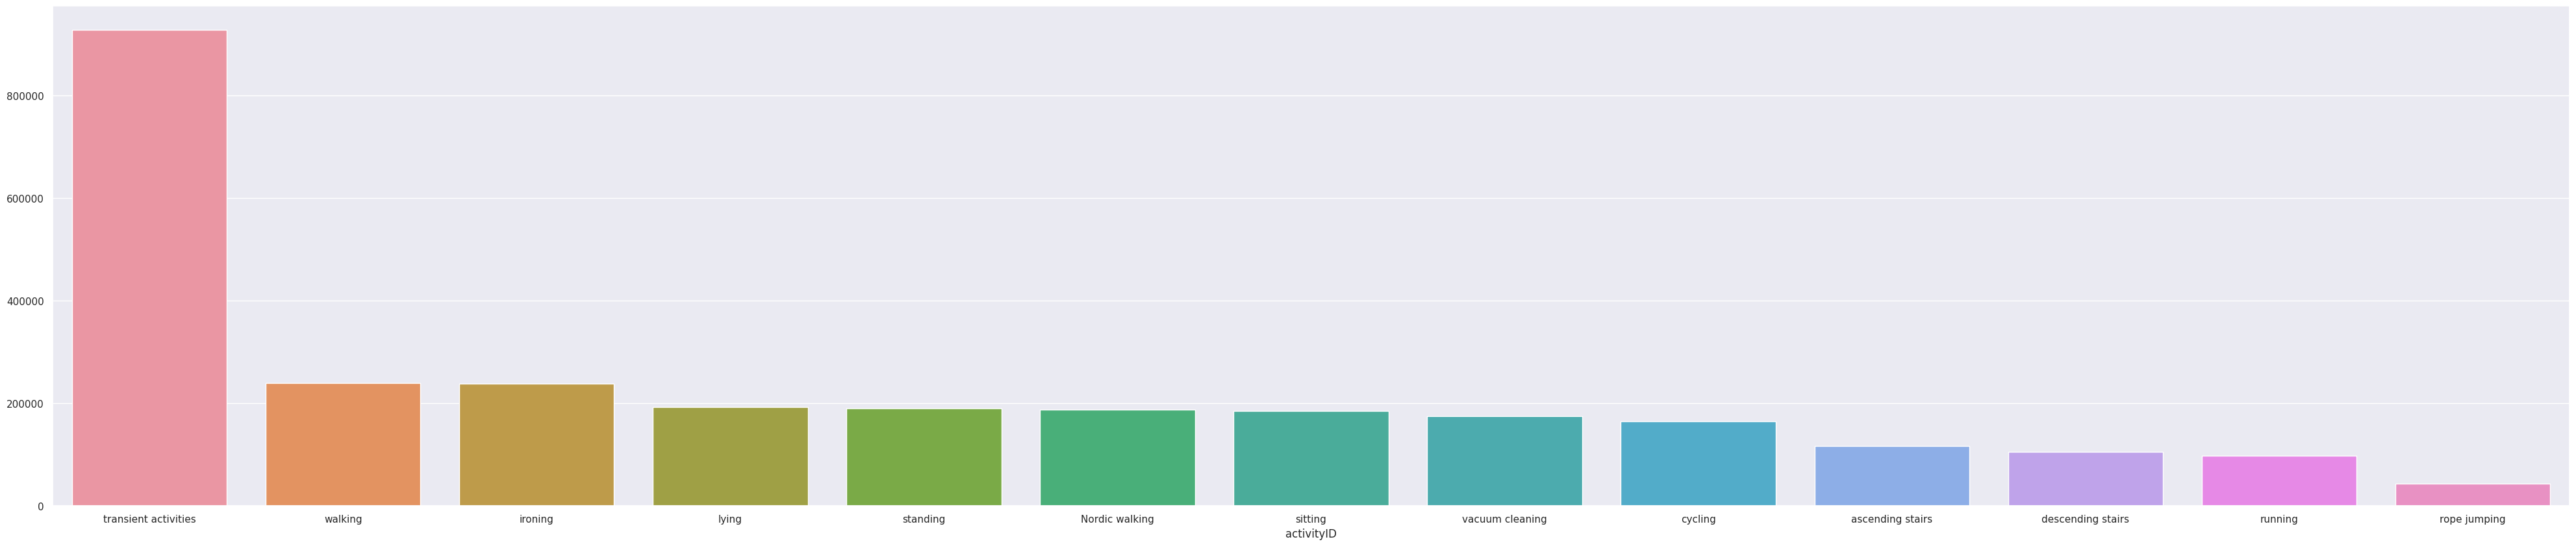

In [ ]:
data = df.value_counts("activityID")
sns.barplot(x=data.index, y=data.array)

<ipython-input-33-f9984dda93fb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["heart_rate"])


<Axes: xlabel='heart_rate', ylabel='Density'>

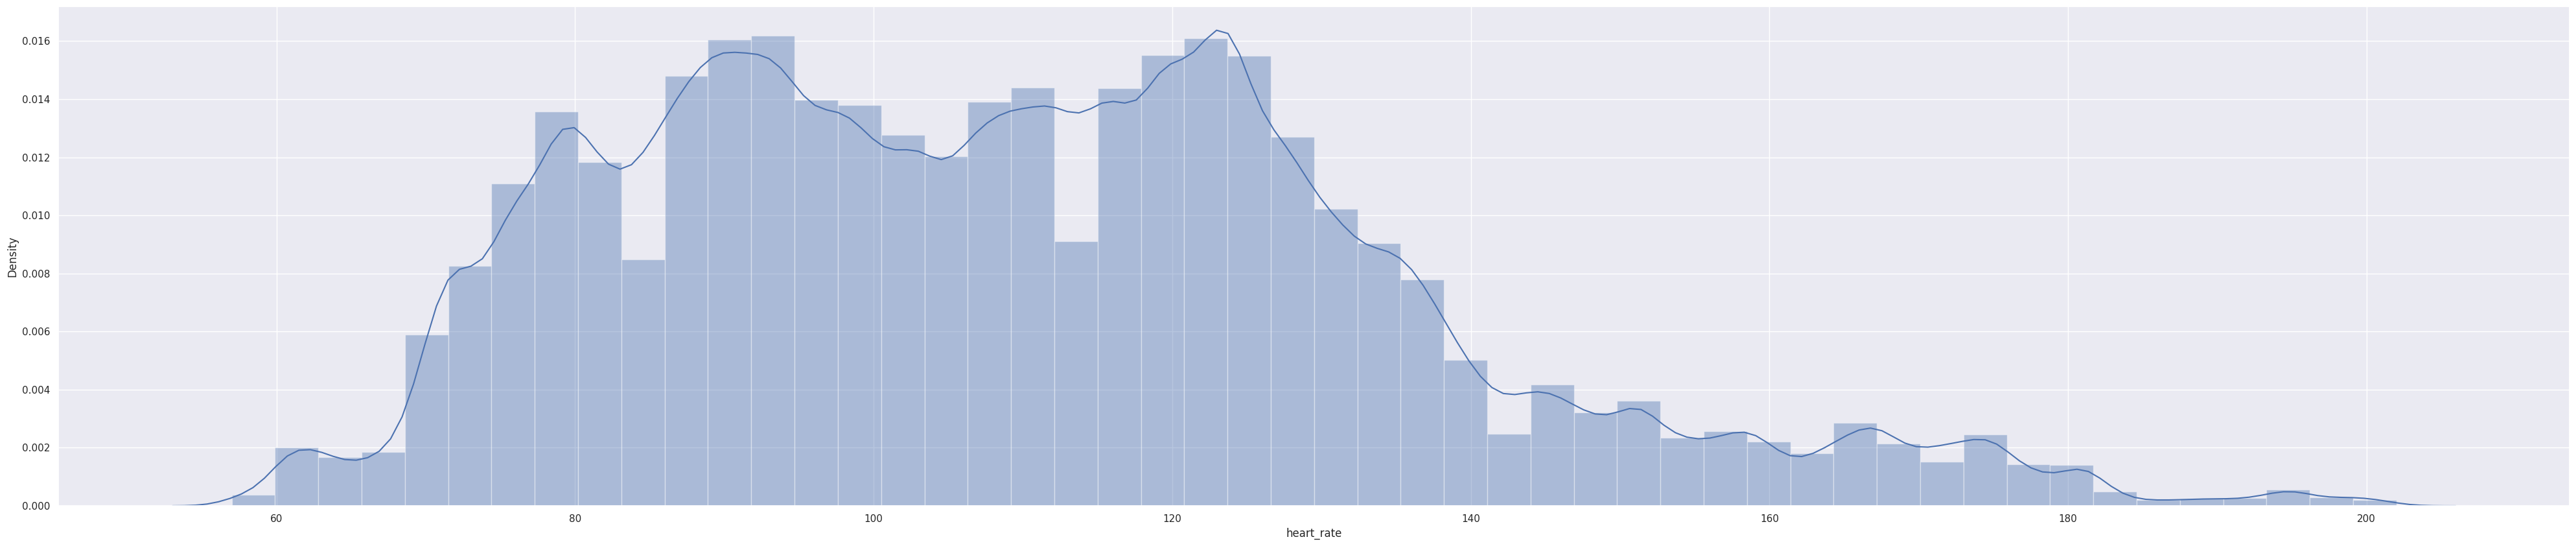

In [ ]:
sns.distplot(df["heart_rate"])

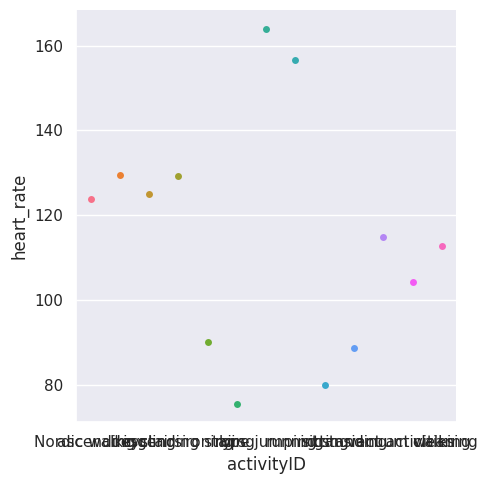

In [ ]:
x = df.groupby("activityID").mean()
sns.catplot(x, x="activityID", y="heart_rate", hue="activityID")

In [6]:


le = LabelEncoder()
df["activityID"] = le.fit_transform(df["activityID"])
df['activityID'].unique()

array([10,  5,  8,  9,  4, 11,  1,  3, 12,  0,  2,  7,  6])

In [7]:
X = df.drop(["activityID", "PeopleId"], axis=1)
y = df["activityID"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

AttributeError: ignored

In [ ]:
########### Model #############
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier()

In [14]:
x = y_test.to_numpy()
x[1]

10

In [12]:
z = X_test.to_numpy()
z[0:2]

array([[ 5.80000e+01,  3.28750e+01,  5.64862e+00,  3.07788e-01,
         8.20601e+00, -1.71759e-02, -3.51637e-02, -2.79280e-03,
         1.67611e+01,  6.28501e+00, -5.01672e+01,  3.49375e+01,
        -3.65996e-01,  1.93317e+00,  9.55474e+00, -1.70618e-02,
         6.47682e-03, -4.72394e-02,  4.00595e+01,  5.56142e+00,
        -2.78214e+01,  3.36250e+01,  2.33741e+00, -9.55003e+00,
         4.91542e-01,  5.28881e-02,  1.89336e-02, -2.60373e-02,
        -2.12840e+01,  1.70950e+01, -1.17350e+01],
       [ 1.25000e+02,  3.13125e+01,  5.97491e+00, -5.25698e+00,
         5.68951e+00,  2.46533e-02, -1.07856e-01,  3.30088e-02,
        -4.43433e-01,  3.39538e+01, -3.09215e+01,  3.67500e+01,
        -6.58565e-01,  9.59871e+00,  1.50928e+00, -2.58279e-02,
         7.79162e-02,  1.65736e-02,  1.86013e+01, -2.61714e+01,
        -1.84255e+01,  3.44375e+01,  9.76381e+00,  8.93601e-01,
        -8.47746e-01,  1.91709e-03,  5.21708e-02, -5.02796e-02,
        -4.73407e+01,  2.34967e+01,  4.66989e+00]])

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss

acc = accuracy_score(x[0:5000], model.predict(z[0:5000]))
acc

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9964